> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb movie data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [220]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [221]:
df= pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [223]:
df.original_title.nunique()

10571

In [224]:
df['tagline']

0                                        The park is open.
1                                       What a Lovely Day.
2                               One Choice Can Destroy You
3                            Every generation has a story.
4                                      Vengeance Hits Home
5          (n. One who has returned, as if from the dead.)
6                                         Reset the future
7                                           Bring Him Home
8             Before Gru, they had a history of bad bosses
9                 Meet the little voices inside your head.
10                                   A Plan No One Escapes
11                                   Expand your universe.
12       There is nothing more human than the will to s...
13                                                Game On.
14                                     A New Age Has Come.
15        No one comes up here without a damn good reason.
16                                            It Ends He

In [225]:
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [226]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [227]:
df.imdb_id.nunique()

10855

In [228]:
df[df.imdb_id.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000e+00,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000e+00,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000e+00,0.0
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,967000.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000e+00,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000e+00,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000e+00,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,4.680167e+02,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000e+00,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000e+00,0.0


In [229]:
df.production_companies.nunique()

7445

In [230]:
print(df[df['budget']==0].shape)
print (df[df['revenue']==0].shape)
print (df[df['popularity']==0].shape)

(5696, 21)
(6016, 21)
(0, 21)


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

In [231]:
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    10865
dtype: int64

In [232]:
df.drop('homepage', axis=1, inplace=True)
df.drop('tagline', axis=1, inplace=True)

In [233]:
df.drop('overview', axis=1, inplace=True)

In [234]:
df.drop('imdb_id', axis=1, inplace=True)

In [235]:
df.drop('keywords', axis=1, inplace=True)

In [236]:
df.drop(['budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [237]:
#drop null values
df.dropna(inplace=True)


In [238]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
id                      9772 non-null int64
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


In [240]:

df['release_date']= pd.to_datetime(df['release_date'])

In [241]:
# clean 0 values in budget and revenue

df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)



In [242]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9772.000000,5.021000e+03,4.750000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,63189.640810,0.694721,3.148929e+07,9.099524e+07,102.926627,239.312014,5.963528,2000.878428
std,90718.059987,1.036931,3.920818e+07,1.632905e+08,27.877432,603.011504,0.913174,13.036794
min,5.000000,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10221.500000,0.232710,6.300000e+06,8.501551e+06,90.000000,18.000000,5.400000,1994.000000
50%,18677.500000,0.419762,1.800000e+07,3.331677e+07,100.000000,46.000000,6.000000,2005.000000
75%,70577.250000,0.776408,4.000000e+07,1.015876e+08,112.000000,173.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



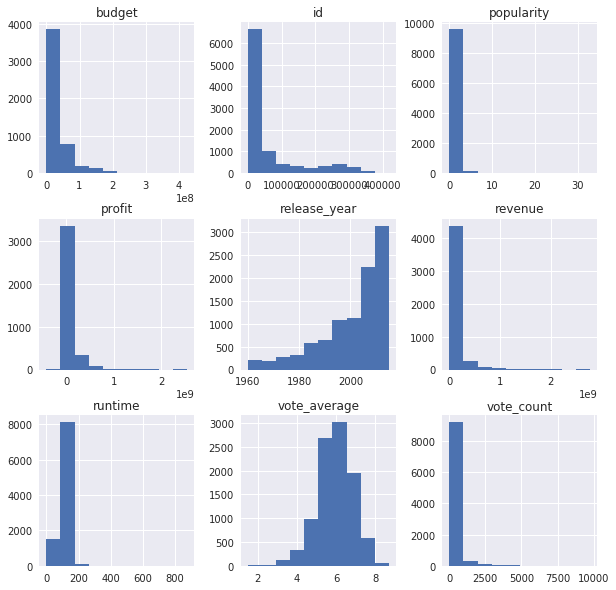

In [243]:
df['profit'] = df['revenue'] - df['budget']
df.hist(figsize=(10, 10));

### Is the popularity associated with release year?

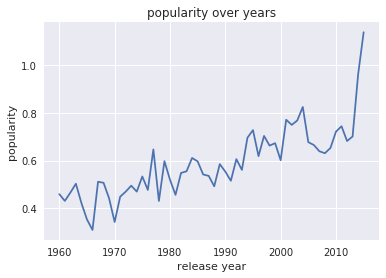

In [244]:
year= df.groupby('release_year')['popularity'].mean()
year.plot(title='popularity over years',kind='line')
plt.xlabel('release year')
plt.ylabel('popularity');

### Why popularity increasing in recent years?

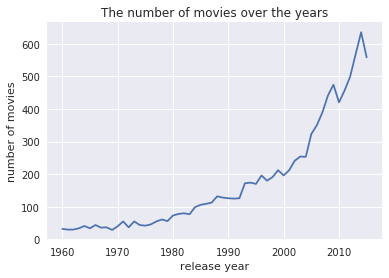

In [245]:
movie_num= df.groupby('release_year')['id'].count()
movie_num.plot(title='The number of movies over the years', kind='line')
plt.xlabel('release year')
plt.ylabel('number of movies');

### How does vote count affect the popularity?

0.84930604132859899

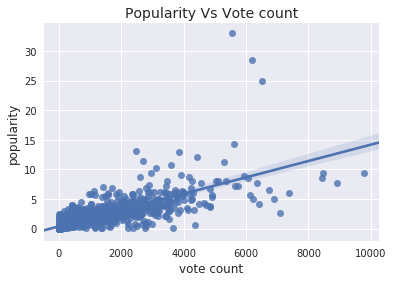

In [246]:
ax = sns.regplot(x=df['vote_count'],y=df['popularity'])

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Vote count",fontsize=14)
ax.set_xlabel("vote count",fontsize=12)
ax.set_ylabel("popularity",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})

def correlation_coeff(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()


correlation_coeff(df['profit'],df['popularity'])

### Define finction to split data

In [247]:
def split_data(column_name):
    df['cast']=df['cast'].astype(str)
    df['director']=df['director'].astype(str)
    
    # From the column entered, eparate the string by '|'
    all_data = df[column_name].str.cat(sep = '|')
    
    # StorE the values separately as series
    all_data = pd.Series(all_data.split('|'))
    
    # Read the descending order, starts with highest number
    count = all_data.value_counts(ascending = False)
    
    return count

### What is the most frequant genre?

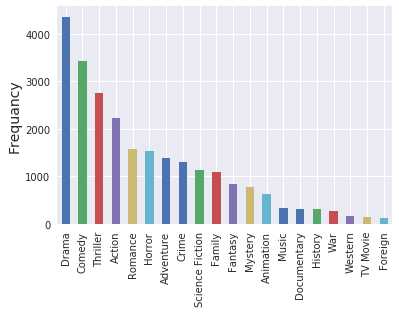

In [248]:
split_data('genres').plot(kind='bar')
plt.ylabel('Frequancy', fontsize=14);

### What is most popular genre ?

In [249]:
# create copy of the dataframe
df1=df

df1 = df1.merge(df.genres.str.split('|', expand=True), left_index=True, right_index=True)
df1 = df1[[0, 1, 2, 3, 'popularity','profit']].melt(id_vars = ['profit','popularity']).drop(columns='variable')

# Some cleaning up, then a simple groupby
df1.value = df1.value.str.replace('[', '')
df1.value = df1.value.str.replace(']', '')
df1.value = df1.value.str.replace(' ', '')

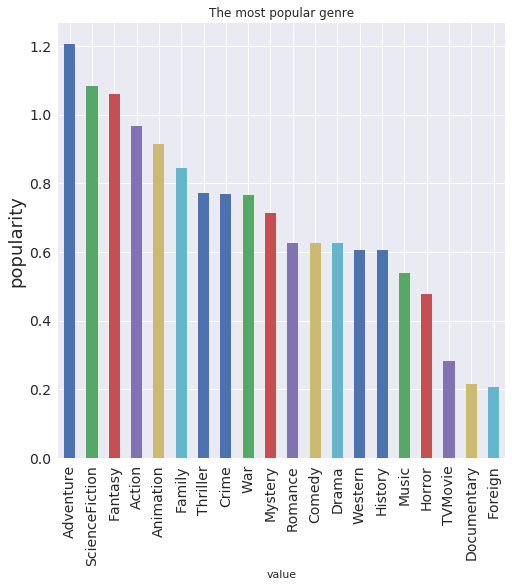

In [263]:
genre_pop= df1.groupby('value')['popularity'].mean()
genre_pop.sort_values(ascending=False).plot(title='The most popular genre', kind='bar', figsize=(8,8),fontsize=14)
plt.ylabel('popularity', fontsize=18);

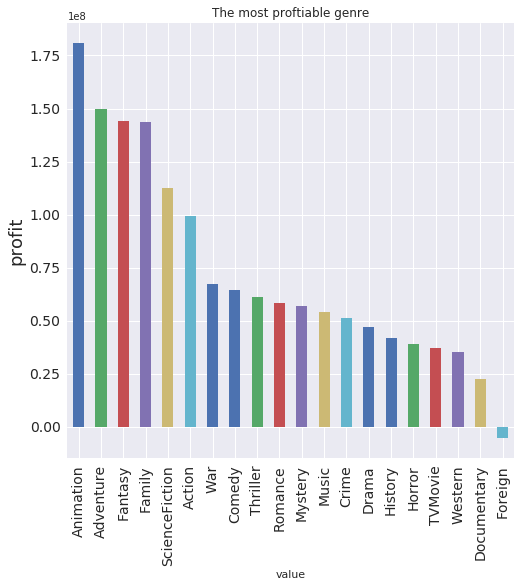

In [271]:
genre_profit= df1.groupby('value')['profit'].mean()
genre_profit.sort_values(ascending=False).plot(title='The most proftiable genre', kind='bar', figsize=(8,8),fontsize=14)
plt.ylabel('profit', fontsize=18);


###  What are top 10 movies have the most profit, budget and vote count?

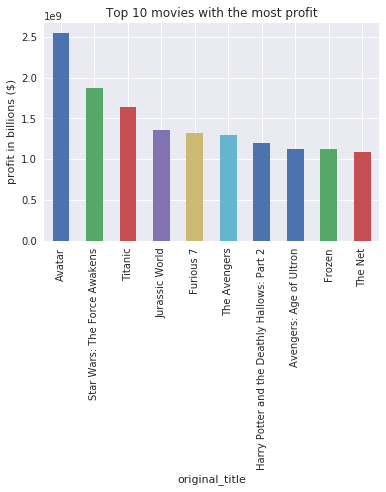

In [270]:
top_movie= df.nlargest(10, 'profit')
top_movie.groupby('original_title')['profit'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 movies with the most profit')
plt.ylabel('profit in billions ($)');


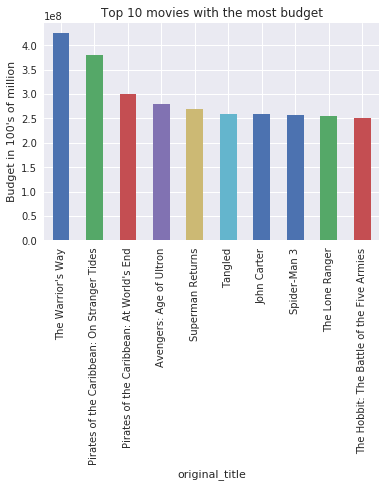

In [253]:
top_movie= df.nlargest(10, 'budget')
top_movie.groupby('original_title')['budget'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 movies with the most budget')
plt.ylabel('Budget in 100\'s of million');


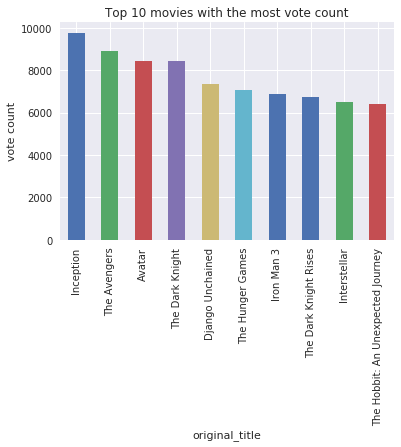

In [254]:
top_movie= df.nlargest(10, 'vote_count')
top_movie.groupby('original_title')['vote_count'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 movies with the most vote count')
plt.ylabel('vote count');

### Who are the top casts and directors?

In [255]:
#most works
top_cast= split_data('cast')
top_cast= pd.DataFrame(data=top_cast)
top_cast.columns=["number of works"]

top_cast.head(10)

,number of works
Robert De Niro,72
Samuel L. Jackson,70
Bruce Willis,62
Nicolas Cage,61
Michael Caine,52
Robin Williams,51
Morgan Freeman,49
John Goodman,48
John Cusack,48
Liam Neeson,47


In [256]:

top_dir= split_data('director')
top_dir= pd.DataFrame(data=top_dir)
top_dir.columns=["number of works"]
top_dir.head(10)

,number of works
Woody Allen,43
Clint Eastwood,34
Steven Spielberg,30
Martin Scorsese,28
Steven Soderbergh,23
Ridley Scott,23
Ron Howard,22
Joel Schumacher,21
Brian De Palma,20
Wes Craven,19


### Which years do movies made the most profits?


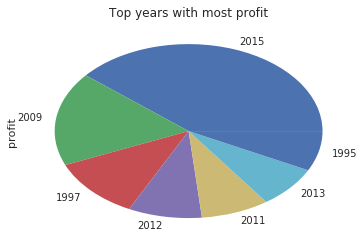

In [257]:
top_year= df.nlargest(10, 'profit')
top_year = top_year.groupby('release_year')['profit'].sum().sort_values(ascending=False).plot(title='Top years with most profit', kind='pie')



<a id='conclusions'></a>
## Conclusions

- Popularity: popularity has positive relationship with vote count and profit 
- Drame, Comedy, Thriller and Action are four most-made genres. The number of drama is the most.
- Adventure, Science fiction, Fantasy and Action are four most popular genres. the most popular is Adventure
- Top 1 cast: Robert De Niro
- Top 1 director: Woody Allen
- 2015, 2009 and 1997 are three most profitable years
- 'Avatar', 'Star Wars: the Force Awakens', 'titanic' are the most profitable movies
- 'The Warrior's Way' is the most budgetary
- 'Inception' and 'The Avengers' get the most votes
- Animation is the most profitable genre

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [258]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0